In [1]:
from proj1_helpers import *
from implementations import *
from preprocessing import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [3]:
def plot_distributions(x, **kwargs):
    plt.figure(figsize=(10,5))
    for i in range(x.shape[1]):
        plt.hist(x[:,i], bins =20, **kwargs, histtype='step')
y_std, x_std, x_mean_std, x_std_std, _ = preprocess(x, y, clean = False, dopca=False)
y_clean, x_clean, x_mean_clean, x_std_clean, transform_clean = preprocess(x, y, clean=True, dopca=True)
y_noclean, x_noclean, x_mean_noclean, x_std_noclean, transform_noclean = preprocess(x, y, clean = False, dopca=True)
y_clean_nopca, x_clean_nopca, x_mean_clean_nopca, x_std_clean_nopca, _ = preprocess(x, y, clean = True, dopca=False)


(250000, 30)
(250000, 30)
(250000, 30)
(250000, 30)


In [4]:
def imshow_data(data):
    fig = plt.figure()
    c = plt.imshow(data, aspect='auto')
    fig.colorbar(c, ax=plt.gca())
    print(np.min(data), np.argmax(data))


(250000, 30)
-104.33989146228663 220305
(250000, 30)
-8.908509319753527 220298
(250000, 30)
-62.307565386622706 220299
(250000, 30)
-2.76545334795972 220298


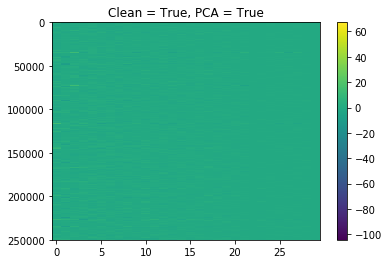

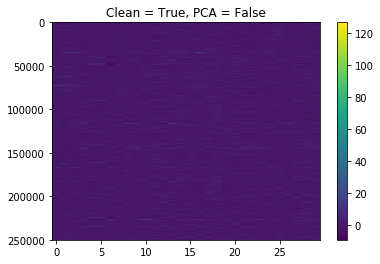

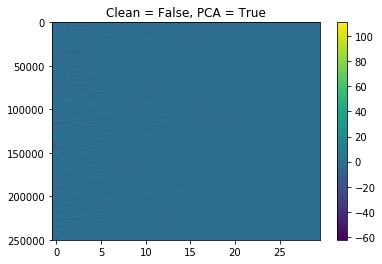

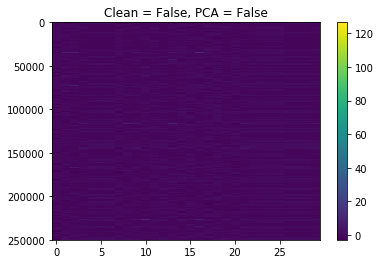

In [5]:
bools = [True,False]
for cl in bools:
    for pc in bools:
        this_y, this_x, this_x_mean, this_x_std, _ = preprocess(x, y, clean = cl, dopca=pc)
        imshow_data(this_x)
        plt.title('Clean = %s, PCA = %s'%(cl, pc))

(250000, 30)
(250000, 30)
(250000, 30)
(250000, 30)


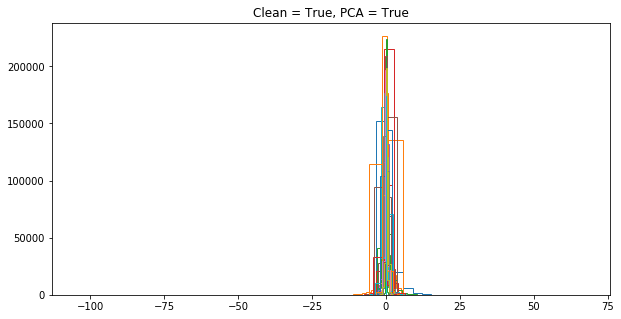

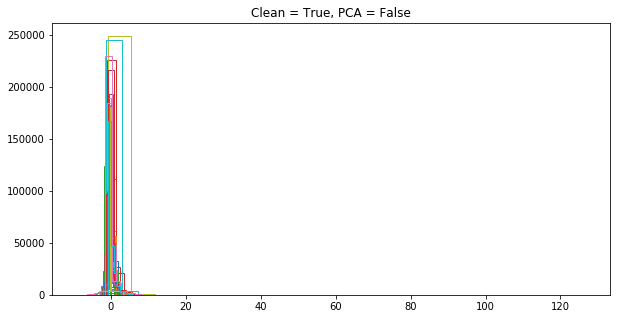

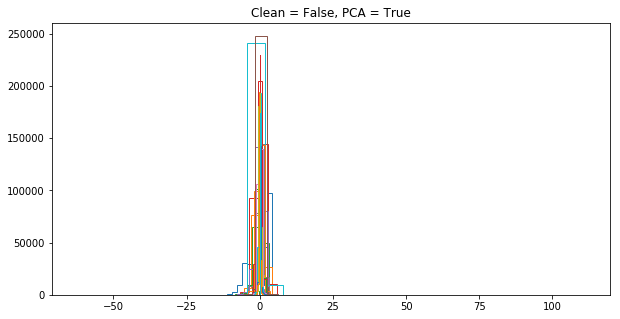

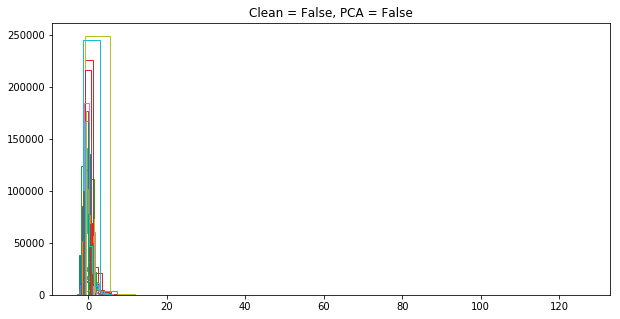

In [6]:
for cl in bools:
    for pc in bools:
        this_y, this_x, this_x_mean, this_x_std, _ = preprocess(x, y, clean = cl, dopca=pc)
        plot_distributions(this_x)
        plt.title('Clean = %s, PCA = %s'%(cl, pc))

True


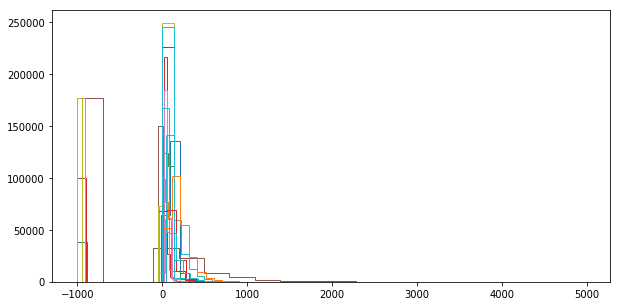

In [7]:
plot_distributions(x)
print((x==-999).any())

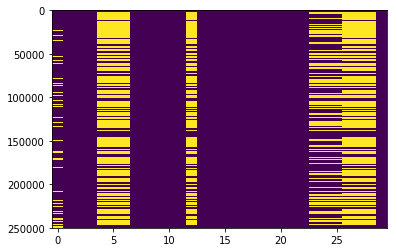

In [9]:
plt.imshow(x==-999, aspect='auto')

{0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28}


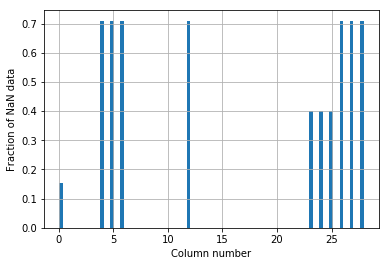

In [43]:
nan_rows, nan_cols = np.where(x==-999)
y_hist, x_hist, _ = plt.hist(nan_cols, bins=60, weights = np.ones(len(nan_cols))/len(y), rwidth=0.7)
plt.xlabel('Column number')
plt.ylabel('Fraction of NaN data')
plt.grid()
print(set(nan_cols))

Text(0, 0.5, 'Fraction of NaN data')

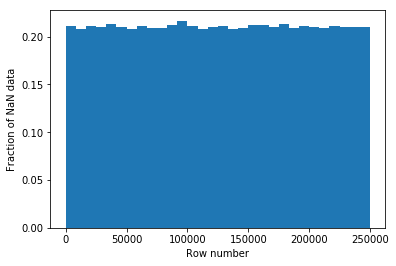

In [24]:
plt.hist(nan_rows, bins=30, weights = np.ones(len(nan_cols))/len(y))
plt.xlabel('Row number')
plt.ylabel('Fraction of NaN data')

-6545.662621326611 155
(250000, 30)
-5.097283445220158e-15 0
(250000, 30)
-0.8360295698308802 868
(250000, 30)
-7.621596087241487e-15 0
(250000, 30)
-0.5393813730034652 806


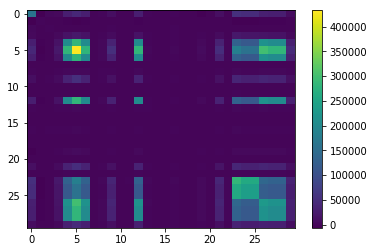

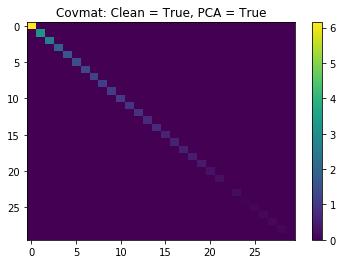

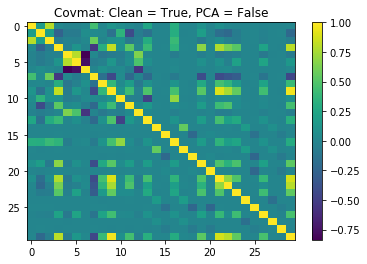

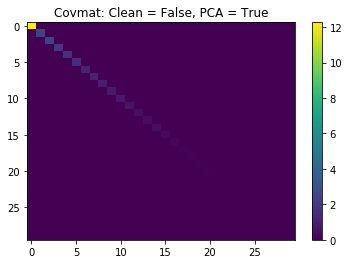

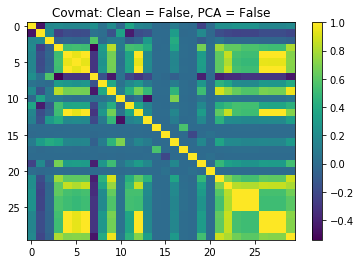

In [52]:
imshow_data(np.cov(x.T))
for cl in bools:
    for pc in bools:
        this_y, this_x, this_x_mean, this_x_std, _ = preprocess(x, y, clean = cl, dopca=pc)
        C = np.cov(this_x.T)
        imshow_data(C)
        plt.title('Covmat: Clean = %s, PCA = %s'%(cl, pc))
